In [1]:
#Saral Bansal
#DATA SCIENCE INTERN AT LETSGROWMORE
#INTERMEDIATE LEVEL TASK 1 : Exploratory Data Analysis on Terrorism

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data=pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,31,33,76,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0.0,NaN,58.0,Dominican Republic,2.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0.0,NaN,130.0,Mexico,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0.0,NaN,160.0,Philippines,5.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0.0,NaN,78.0,Greece,8.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0.0,NaN,101.0,Japan,4.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [4]:
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
9651,197911130005,1979,11,13,NaN,0.0,NaN,11.0,Argentina,3.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
9652,197911130006,1979,11,13,NaN,0.0,NaN,45.0,Colombia,3.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
9653,197911130007,1979,11,13,NaN,0.0,NaN,45.0,Colombia,3.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
9654,197911130008,1979,11,13,NaN,0.0,NaN,162.0,Portugal,8.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
9655,197911140001,1979,11,14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Columns: 135 entries, eventid to related
dtypes: float64(77), int64(4), object(54)
memory usage: 9.9+ MB


In [6]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,9.656000e+03,9656.000000,9656.000000,9656.000000,9655.000000,9655.000000,9655.000000,9353.000000,9353.000000,9655.000000,...,2.820000e+02,1.0,7.900000e+01,1.0,449.000000,347.000000,9655.000000,9655.000000,9655.000000,9655.000000
mean,1.976036e+11,1975.971935,6.282001,15.164561,0.026308,220.367892,6.021647,33.155350,-20.829568,1.203418,...,5.019458e+06,20000.0,1.498046e+06,0.0,2.810690,6.345821,-3.149871,-3.096634,0.347903,-1.825893
std,2.889043e+08,2.890571,3.368098,9.022129,0.160057,187.250876,3.289915,22.172133,53.255134,0.823601,...,5.982205e+07,NaN,5.104807e+06,NaN,1.261473,23.262047,4.430647,4.482302,0.664311,4.232378
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-45.867889,-157.818968,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.974060e+11,1974.000000,3.000000,7.000000,0.000000,96.000000,2.000000,25.699073,-73.931351,1.000000,...,0.000000e+00,20000.0,6.000000e+03,0.0,2.000000,1.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.977060e+11,1977.000000,6.000000,15.000000,0.000000,185.000000,8.000000,40.697132,-5.956210,1.000000,...,1.200000e+04,20000.0,8.000000e+04,0.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.978123e+11,1978.000000,9.000000,23.000000,0.000000,217.000000,8.000000,46.669097,11.119059,1.000000,...,5.000000e+05,20000.0,1.000000e+06,0.0,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,1.979111e+11,1979.000000,12.000000,31.000000,1.000000,605.000000,12.000000,64.837778,172.636225,5.000000,...,1.000000e+09,20000.0,4.100000e+07,0.0,7.000000,187.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.dtypes

eventid         int64
iyear           int64
imonth          int64
iday            int64
approxdate     object
               ...   
INT_LOG       float64
INT_IDEO      float64
INT_MISC      float64
INT_ANY       float64
related        object
Length: 135, dtype: object

In [42]:
data.corr

<bound method DataFrame.corr of            eventid  iyear  imonth  iday approxdate  extended resolution  \
0     197000000001   1970       7     2        NaN       0.0        NaN   
1     197000000002   1970       0     0        NaN       0.0        NaN   
2     197001000001   1970       1     0        NaN       0.0        NaN   
3     197001000002   1970       1     0        NaN       0.0        NaN   
4     197001000003   1970       1     0        NaN       0.0        NaN   
...            ...    ...     ...   ...        ...       ...        ...   
9651  197911130005   1979      11    13        NaN       0.0        NaN   
9652  197911130006   1979      11    13        NaN       0.0        NaN   
9653  197911130007   1979      11    13        NaN       0.0        NaN   
9654  197911130008   1979      11    13        NaN       0.0        NaN   
9655  197911140001   1979      11    14        NaN       NaN        NaN   

      country         country_txt  region  ... addnotes scite1 scit

In [8]:
data.isnull().sum()

eventid          0
iyear            0
imonth           0
iday             0
approxdate    9639
              ... 
INT_LOG          1
INT_IDEO         1
INT_MISC         1
INT_ANY          1
related       9034
Length: 135, dtype: int64

In [9]:
for i in data.columns:
    print(i, end=" ,")

eventid ,iyear ,imonth ,iday ,approxdate ,extended ,resolution ,country ,country_txt ,region ,region_txt ,provstate ,city ,latitude ,longitude ,specificity ,vicinity ,location ,summary ,crit1 ,crit2 ,crit3 ,doubtterr ,alternative ,alternative_txt ,multiple ,success ,suicide ,attacktype1 ,attacktype1_txt ,attacktype2 ,attacktype2_txt ,attacktype3 ,attacktype3_txt ,targtype1 ,targtype1_txt ,targsubtype1 ,targsubtype1_txt ,corp1 ,target1 ,natlty1 ,natlty1_txt ,targtype2 ,targtype2_txt ,targsubtype2 ,targsubtype2_txt ,corp2 ,target2 ,natlty2 ,natlty2_txt ,targtype3 ,targtype3_txt ,targsubtype3 ,targsubtype3_txt ,corp3 ,target3 ,natlty3 ,natlty3_txt ,gname ,gsubname ,gname2 ,gsubname2 ,gname3 ,gsubname3 ,motive ,guncertain1 ,guncertain2 ,guncertain3 ,individual ,nperps ,nperpcap ,claimed ,claimmode ,claimmode_txt ,claim2 ,claimmode2 ,claimmode2_txt ,claim3 ,claimmode3 ,claimmode3_txt ,compclaim ,weaptype1 ,weaptype1_txt ,weapsubtype1 ,weapsubtype1_txt ,weaptype2 ,weaptype2_txt ,weapsubtype2

In [10]:
cols = data.columns

In [11]:
cols = []
for i in cols:
    if data[i].isnull().sum() > 1500000:
        cols.append(i)

In [12]:
data = data.drop(cols, axis=1)

In [13]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [14]:
data.shape

(9656, 135)

In [15]:
countries_with_most_terrorism = data.country_txt.value_counts().head(10)
countries_with_most_terrorism

United Kingdom    1599
United States     1460
Italy              992
Spain              890
Turkey             475
France             464
Colombia           404
El Salvador        387
Argentina          326
Nicaragua          286
Name: country_txt, dtype: int64

In [16]:
countries = list(countries_with_most_terrorism.index)
countries

['United Kingdom',
 'United States',
 'Italy',
 'Spain',
 'Turkey',
 'France',
 'Colombia',
 'El Salvador',
 'Argentina',
 'Nicaragua']

Text(0.5, 1.0, 'Countries with most terrorism')

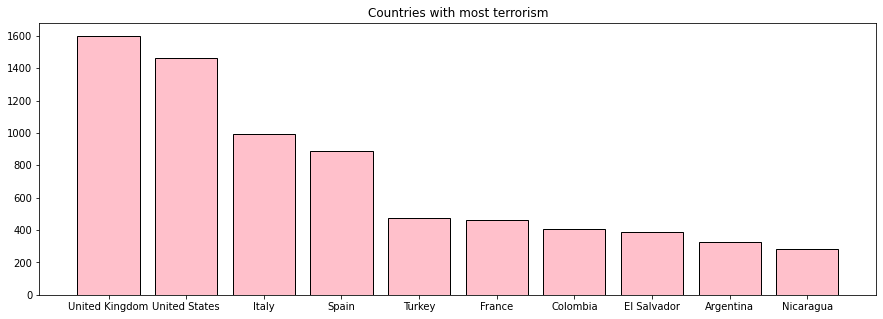

In [43]:
x, y = countries_with_most_terrorism.index, countries_with_most_terrorism.values

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x, y,align="center",edgecolor="black",color="pink")
plt.xticks(rotation=0)
plt.title("Countries with most terrorism")

In [18]:
# Filtering country data
data_countries = data[data['country_txt'].isin(countries)]
data_countries.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
5,197001010002,1970,1,1,NaN,0.0,NaN,217.0,United States,1.0,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
7,197001020002,1970,1,2,NaN,0.0,NaN,217.0,United States,1.0,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
8,197001020003,1970,1,2,NaN,0.0,NaN,217.0,United States,1.0,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0.0,0.0,0.0,0.0,NaN
9,197001030001,1970,1,3,NaN,0.0,NaN,217.0,United States,1.0,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0.0,0.0,0.0,0.0,NaN
10,197001050001,1970,1,1,NaN,0.0,NaN,217.0,United States,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN


In [21]:
data_countries.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [22]:
# Filtering top 10 Countries on which max attacks by terrorists
raw_data = data_countries.iyear.value_counts().head(10)
raw_data

1979    1637
1978    1134
1977    1075
1976     704
1975     587
1970     522
1974     438
1972     427
1971     395
1973     364
Name: iyear, dtype: int64

Text(0.5, 1.0, 'Years with most number of terrorism actively.')

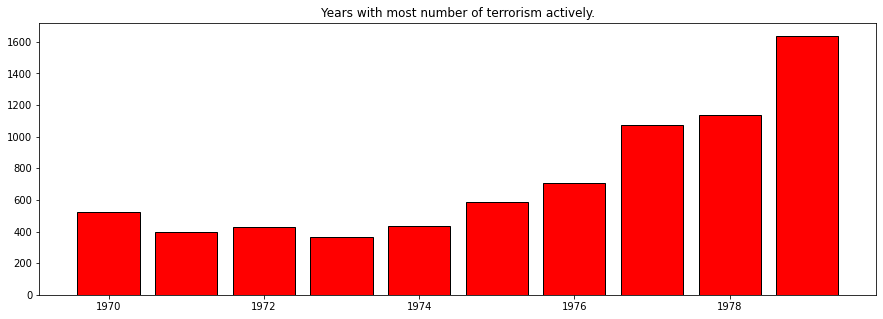

In [45]:
# Displaying years with most number of terrorism activities happend.

year = raw_data
x, y = year.index, year.values

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x, y, edgecolor = "Black", color = "red")
plt.xticks(rotation=0)
plt.title("Years with most number of terrorism actively.")

Text(0.5, 1.0, 'Type of Target')

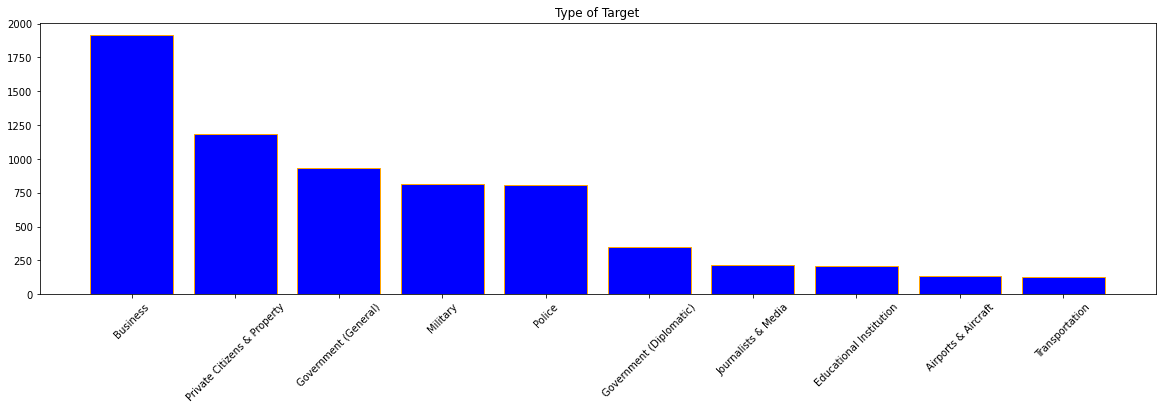

In [46]:
# Top 10 Targets that are attacked most by terrorists

target = data_countries['targtype1_txt'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(20, 5))
ax.bar(target.index, target.values, edgecolor = "orange", color = "blue")
plt.xticks(rotation = 45)
plt.title("Type of Target")

(-1.1127713370161347, 1.166079507272753, -1.11188349834223, 1.1913221433358845)

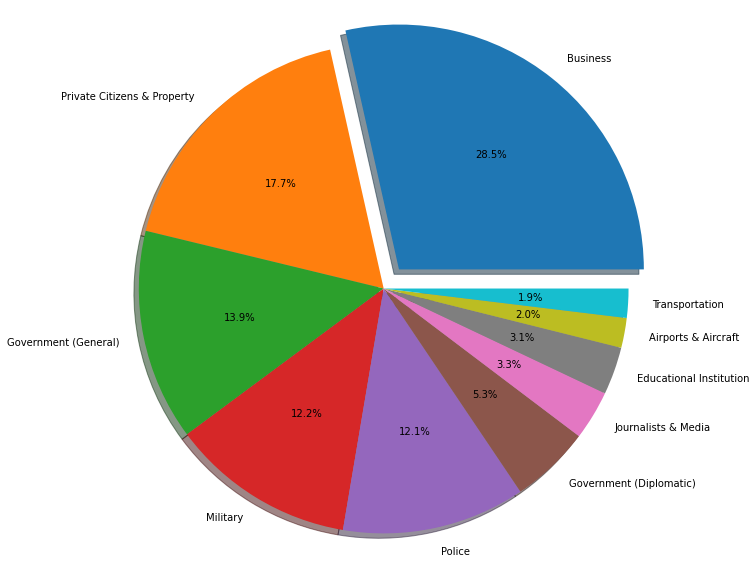

In [25]:
target = data_countries['targtype1_txt'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(10,10))
explode = (0.1,0,0,0,0,0,0,0,0,0)  # Only "Explodes" the 2nd slice(i.e. 'Hogs')

#ax.bar(target.index, target.values, color = "skyblue")
ax.pie(target.values, explode = explode, labels = target.index, autopct = '%1.1f%%',shadow=True)
ax.axis('equal') # Equals aspect ratio ensures that pie is draen as a circle.

Text(0.5, 1.0, 'Type of Attacks')

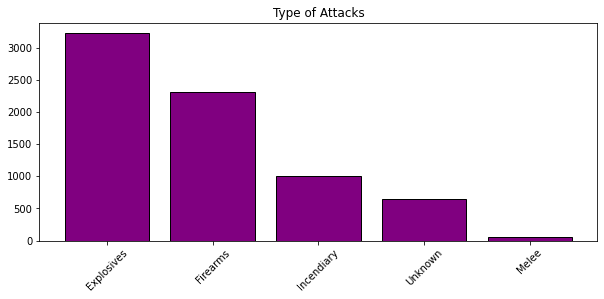

In [27]:
# Top 5 most attacks actioned by terrorists with particular materials / Weapons.

weapon_types = data_countries["weaptype1_txt"].value_counts().head(5)

fix,ax = plt.subplots(figsize=(10,4))
ax.bar(weapon_types.index, weapon_types.values, edgecolor="black", color = "purple")
plt.xticks(rotation=45)
plt.title("Type of Attacks")

(-1.19886860335511, 1.122974143930536, -1.181370666094262, 1.2338961222890188)

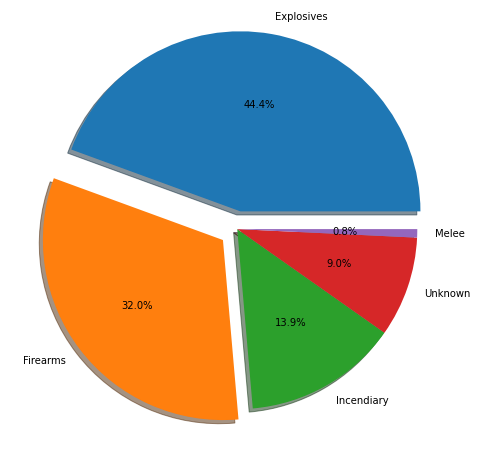

In [29]:
# Top 5 most attacks actioned by terrorists with particular materials / Weapons.

weapon_types = data_countries["weaptype1_txt"].value_counts().head(5)

fig, ax = plt.subplots(figsize=(8,8))
explode = (0.1,0.1,0,0,0)  

#ax.bar(target.index, target.values, color = "skyblue")
ax.pie(weapon_types.values, explode = explode, labels = weapon_types.index, autopct = '%1.1f%%',shadow=True)
ax.axis('equal') # Equals aspect ratio ensures that pie is draen as a circle.

In [31]:
data.attacktype1_txt.value_counts()

Bombing/Explosion                      4237
Assassination                          1947
Armed Assault                          1352
Facility/Infrastructure Attack         1067
Hostage Taking (Kidnapping)             525
Unknown                                 278
Hostage Taking (Barricade Incident)     163
Hijacking                                61
Unarmed Assault                          25
Name: attacktype1_txt, dtype: int64

Text(0.5, 1.0, 'Type of Attacks')

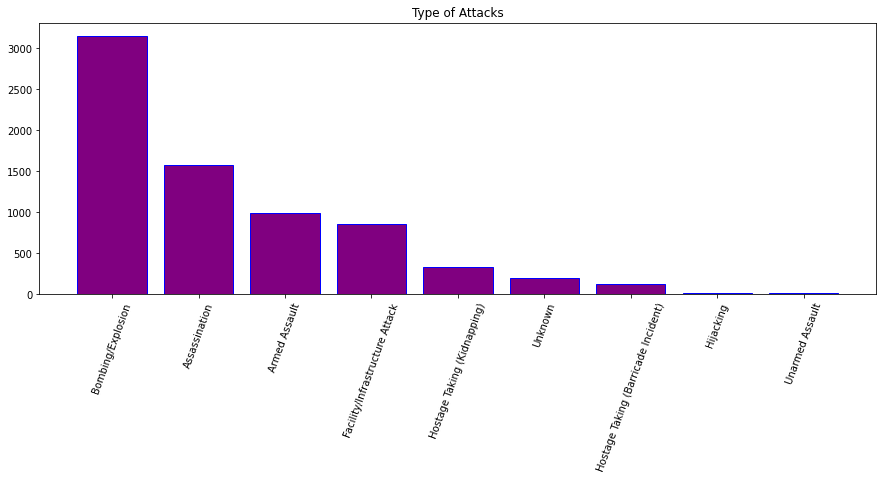

In [32]:
# Top 10 most type of attacks actioned by terrorists.

attack_type=data_countries['attacktype1_txt'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(attack_type.index,attack_type.values, edgecolor = "blue", color = "purple")
plt.xticks(rotation=70)
plt.title("Type of Attacks")

(-1.1274734601708551,
 1.123043803438325,
 -1.1153156673648807,
 1.230219533767433)

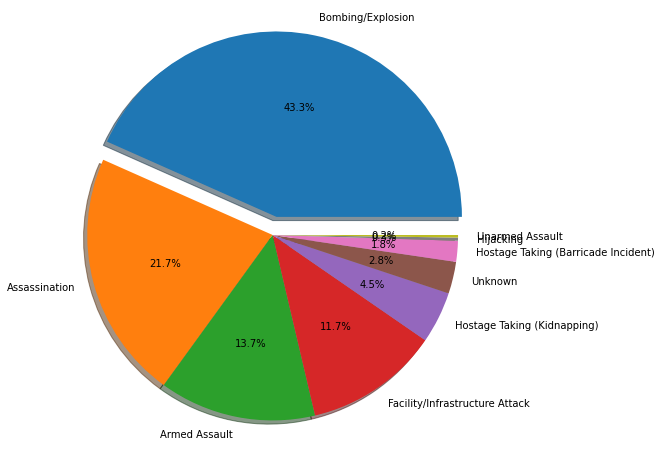

In [33]:
# Top 10 most type of attacks actioned by terrorists.

attack_type=data_countries['attacktype1_txt'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(8,8))
explode = (0.1,0,0,0,0,0,0,0,0)  

#ax.bar(target.index, target.values, color = "skyblue")
ax.pie(attack_type.values, explode = explode, labels = attack_type.index, autopct = '%1.1f%%',shadow=True)
ax.axis('equal') # Equals aspect ratio ensures that pie is draen as a circle.

In [34]:
# Top 10 most cities where terrorist attacks actioned by terrorists.

cities_with_most_terrorism = data.city.value_counts().head(10)
cities = list(cities_with_most_terrorism.index)
cities_with_most_terrorism

Belfast          801
Unknown          405
Rome             335
New York City    322
Paris            234
San Salvador     212
Buenos Aires     199
Madrid           199
Ankara           142
Istanbul         132
Name: city, dtype: int64

Text(0.5, 1.0, 'Cities with most terrorism')

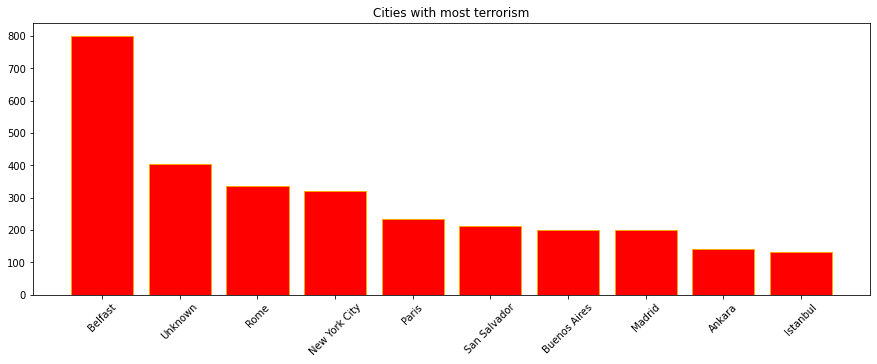

In [35]:
# Graphical representation of top 10 Cities with most terrorism.
x, y = cities_with_most_terrorism.index,cities_with_most_terrorism.values

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x, y, edgecolor = "orange", color = "red")
plt.xticks(rotation = 45)
plt.title("Cities with most terrorism")

In [36]:
religious_target = data[data["targtype1_txt"]=="Religious Figures/Institutions"]
religious_target.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
35,197001280002,1970,1,28,NaN,0.0,NaN,217.0,United States,1.0,...,NaN,Committee on Government Operations United Stat...,"""Synagogue Blasted,"" Tri City Herald, January ...",NaN,Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
49,197002060003,1970,2,6,NaN,0.0,NaN,217.0,United States,1.0,...,This might be linked with 197001280002. Both ...,Committee on Government Operations United Stat...,NaN,NaN,Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
117,197003090004,1970,3,9,NaN,0.0,NaN,217.0,United States,1.0,...,NaN,Committee on Government Operations United Stat...,NaN,NaN,Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
190,197004130003,1970,4,13,NaN,0.0,NaN,217.0,United States,1.0,...,Part of a multiple attack with 197004130002 an...,Committee on Government Operations United Stat...,"""Teamster Walkouts Close More Plants,"" Washing...",NaN,Hewitt Project,-9.0,-9.0,0.0,-9.0,"197004130002, 197004130003, 197004130004"
204,197004190001,1970,4,19,NaN,0.0,NaN,217.0,United States,1.0,...,This was part of a multiple attack 19700419000...,"Earl Caldwell, ""Fear Grows in Seattle as Polic...","""4 Buildings Bombed in Seattle,"" Washington Po...","Carole Beers, ""David Sprague, Former Legislato...",Hewitt Project,-9.0,-9.0,0.0,-9.0,"197004190001, 197004190002, 197004190003, 1970..."


Text(0.5, 1.0, 'Countries with most terrorism on religious Figures')

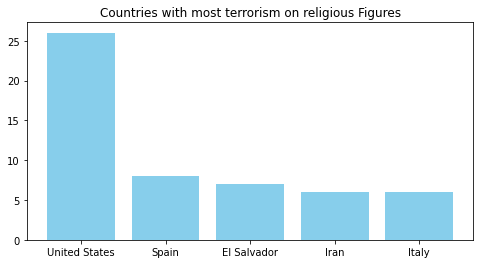

In [39]:
# Graphical representation of top 5 Countries with most terrorism on religious Figures or Institutions.

x, y = religious_target["country_txt"].value_counts().head().index,religious_target["country_txt"].value_counts().head().values

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x, y, color = "skyblue")
plt.title("Countries with most terrorism on religious Figures")

(-1.1081821309406008,
 1.103494066745205,
 -1.1153717839232133,
 1.213059138258847)

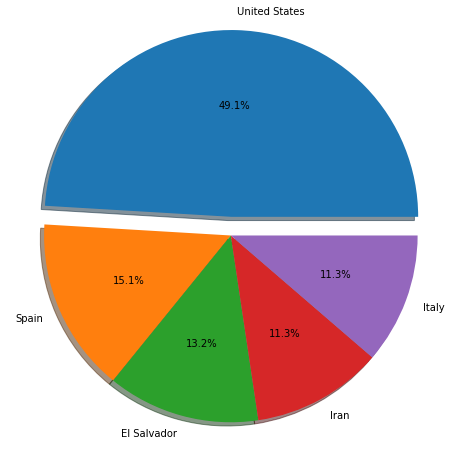

In [41]:
# Top 10 most type of attacks actioned by terrorists.

y, x = religious_target["country_txt"].value_counts().head().index,religious_target["country_txt"].value_counts().head().values

fig, ax = plt.subplots(figsize=(8,8))
explode = (0.1,0,0,0,0)  

#ax.bar(target.index, target.values, color = "skyblue")
ax.pie(x, explode = explode, labels = y, autopct = '%1.1f%%',shadow=True)
ax.axis('equal') # Equals aspect ratio ensures that pie is draen as a circle.